# transformada de Fourier

#### 1) Código personal que calcule transformada de Fourier de una función f(x)

In [1]:
import matplotlib. pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint

### Construcción de la transformada de Fourier

Tenemos una función $f(x)$ periódica de periodo $2l$ y de cuadrado integrable sobre $[-l,l]$. La función tiene una serie de Fourier convergente:  

\begin{equation}
f(x) = \sum _{n =-\infty}^{\infty} C_n \omega_n(x)
\end{equation}


donde:
\begin{equation}
       C_n =  \int_{-l}^{l} \frac{e^{-in\pi\epsilon/l}}{\sqrt{2l}} f(\epsilon) d\epsilon \quad y \quad \omega_n(x) = \frac{e^{in\pi x/l}}{\sqrt{2l}} \quad \forall n \in Z
\end{equation}


\begin{equation}
\Rightarrow  f(x) = \sum _{n =-\infty}^{\infty} \left( \int_{-l}^{l} \frac{e^{-in\pi\epsilon/l}}{\sqrt{2l}} f(\epsilon) d\epsilon \right) \frac{e^{in\pi x/l}}{\sqrt{2l}}
\end{equation}


Ahora, definamos $k_n = n\pi/l$, el parametro $k$ va a cambiar de $- \infty$ hasta $\infty$ por un salto de longitud $\Delta k_n = k_{n+1} - k_n = \pi/l$ y entonces $1/l = \Delta k_n/\pi$

Cuando $l \rightarrow \infty$ tenemos que:

i) la intgral $\int_{-l}^{l}$ va a devenir $\int_{-\infty}^{\infty}$

ii) $k_n$ va a tender a una variable continua $k$

iii) $f(x)$ va a devenir:

\begin{equation}
\Rightarrow  f(x) = \sum _{n =-\infty}^{\infty} \left( \int_{-l}^{l} \frac{e^{-i k_n \epsilon}}{\sqrt{2\pi}} f(\epsilon) d\epsilon \right) \frac{e^{i k_n x}}{\sqrt{2\pi}} \Delta k_n
\end{equation}


\begin{equation}
f(x) = \sum _{n =-\infty}^{\infty} \hat{f}(k_n)  \frac{e^{i k_n x}}{\sqrt{2\pi}} \Delta k_n
\end{equation}


\begin{equation}
f(x) \rightarrow  \int _{-\infty}^{\infty} \hat{f}(k)  \frac{e^{i k x}}{\sqrt{2\pi}} dk
\end{equation}

Definimos una función como la transformada de fourier inversa:

\begin{equation}
\hat{f}(k) = \sum _{n =-\infty}^{\infty} f(x_n)  \frac{e^{-i x_n k}}{\sqrt{2\pi}} \Delta x_n
\end{equation}

In [2]:
def trans_fourire(fun,x_n):
    norm = np.divide(1,np.power(2*np.pi,0.5))
    k = x_n
    f_k = []
    for i in range(len(k)):
        arg_2 = []
        for j in range(len(x_n)):
            if j<len(x_n)-1:
                ex = np.exp(-complex(0,1)*x_n[j]*k[i])
                arg_2.append(fun[j]*ex*norm*(x_n[j+1]-x_n[j]))
        f_k.append(np.sum(arg_2))
    return [k,np.array(f_k)]

#### Muestra la transformada de Fourier de una Gaussiana con dispersión s y centrada en x0=0.

Definimos la función que queremos transformar:

\begin{equation}
f(x) = \frac{1}{\delta}e^{-\frac{(x-\mu)^2}{2\delta^2}}
\end{equation}

Que en este caso es la distribución normal o distribución gaussiana. 

In [14]:
def gaus (x,mu,delta):
    potencia = np.divide(np.power(x-mu,2),2*pow(delta,2))
    return np.exp(-potencia)

Escogiendo en este caso $\mu = 0$ y $\delta = 2$

In [15]:
x = np.linspace(-10,10,1000)
mu, delta = 0, 4
f_x = gaus(x,mu,delta)
k,f_k = trans_fourire(f_x,x)

Graficamos la función gaussiana $f(x)$ y su transformada $\hat{f}(k)$

/home/echeveste/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


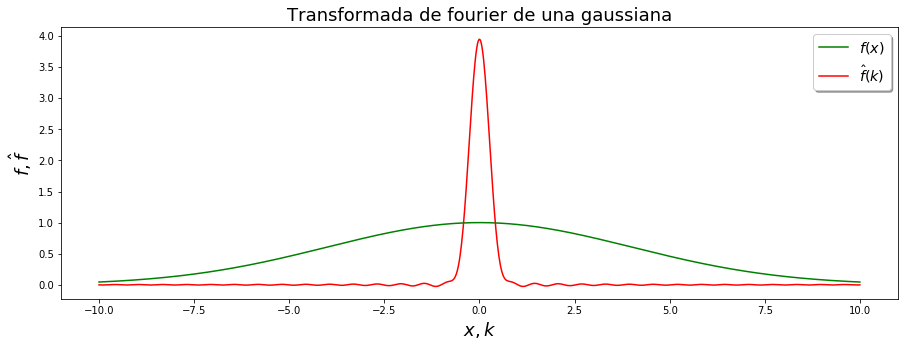

In [16]:
plt.figure(figsize=(15,5))
plt.title("Transformada de fourier de una gaussiana",fontsize=18)
plt.plot(x,f_x,'g-',label='$f(x)$')
plt.plot(k,f_k,'r-',label='$\hat{f}(k)$')
plt.xlabel('$x,k$',fontsize=18)
plt.ylabel('$f , \hat{f}$',fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')

#### a. ¿Qué pasa si x0=1 con la transformada? 

Ahora, escogiendo en este caso $\mu = 1$ y $\delta = 3$

In [17]:
x_2 = np.linspace(-10,10,2000)
mu_2, delta_2 = 1, 3
f_x_2 = gaus(x_2,mu_2,delta_2)
k_2,f_k_2 = trans_fourire(f_x_2,x_2)

Graficamos la función gaussiana $f(x)$ y su transformada $\hat{f}(k)$

/home/echeveste/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


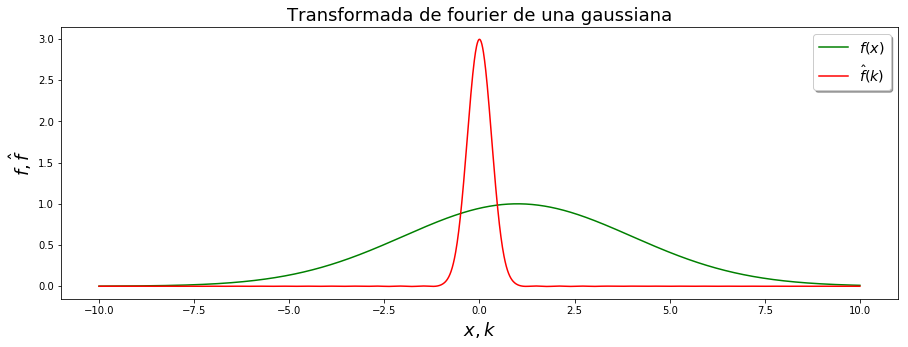

In [18]:
plt.figure(figsize=(15,5))
plt.title("Transformada de fourier de una gaussiana",fontsize=18)
plt.plot(x_2,f_x_2,'g-',label='$f(x)$')
plt.plot(k_2,f_k_2,'r-',label='$\hat{f}(k)$')
plt.xlabel('$x,k$',fontsize=18)
plt.ylabel('$f , \hat{f}$',fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')

#### b. Escoge varios valores de s, ¿Qué pasa si s=1? 

In [19]:
x_3 = np.linspace(-10,10,1000)
mu_3, delta_3 = 0,[1,2,3,4]
f_x_3, k_3, f_k_3 = [], [], []
for i in range(len(delta_3)):
    f_x_3.append(gaus(x_3,mu_3,delta_3[i]))
    f_k_3.append(trans_fourire(f_x_3[i],x_3))

/home/echeveste/.local/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


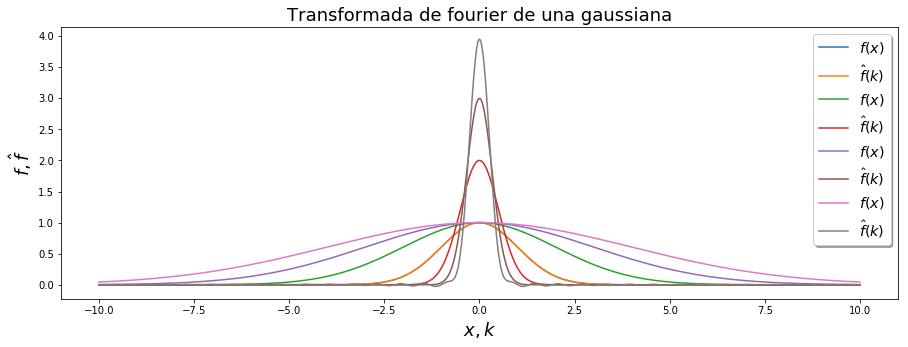

In [20]:
plt.figure(figsize=(15,5))
plt.title("Transformada de fourier de una gaussiana",fontsize=18)
for i in range(len(f_x_3)):
    plt.plot(x_3,f_x_3[i],label='$f(x)$')
    plt.plot(f_k_3[i][0],f_k_3[i][1],label='$\hat{f}(k)$')
plt.xlabel('$x,k$',fontsize=18)
plt.ylabel('$f , \hat{f}$',fontsize=18)
plt.legend(loc='upper right', shadow=True, fontsize='x-large')

#### c. Compara lo obtenido con la función FFT (Nota: la salida de FFT puede esta con otro orden en k!)